# Analyzing trends in electric vehicles (EVs) based on location and other features

In [1]:
import pandas as pd
data = pd.read_csv("Electric_Vehicle_Population_Data.csv")
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP8D,King,Shoreline,WA,98177.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
1,5YJSA1E45K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
2,WVGUNPE28M,Kitsap,Olalla,WA,98359.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP6H,Thurston,Olympia,WA,98501.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
4,1FADP5CU9G,Thurston,Olympia,WA,98506.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216767,1G1RB6E44D,Douglas,East Wenatchee,WA,98802.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,12.0,122822822,POINT (-120.29473 47.41515),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
216768,KNDCS3LF9R,Whatcom,Bellingham,WA,98229.0,2024,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,40.0,267143887,POINT (-122.45486 48.7449),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
216769,7SAYGAEE9R,King,Redmond,WA,98052.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,274988388,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
216770,1G1RB6E49D,Pierce,Gig Harbor,WA,98329.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,117353064,POINT (-122.6658 47.38336),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


## 1. Understand the Dataset
* Location-related columns: County, City, State, Postal Code, Vehicle Location, and Electric Utility.
* EV-specific columns: Electric Range, Electric Vehicle Type, Make, Model, and CAFV Eligibility.
* Year-related columns: Model Year.
* Other numeric attributes: Base MSRP, Legislative District.

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216772 entries, 0 to 216771
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         216772 non-null  object 
 1   County                                             216767 non-null  object 
 2   City                                               216767 non-null  object 
 3   State                                              216772 non-null  object 
 4   Postal Code                                        216767 non-null  float64
 5   Model Year                                         216772 non-null  int64  
 6   Make                                               216772 non-null  object 
 7   Model                                              216772 non-null  object 
 8   Electric Vehicle Type                              216772 non-null  object

In [110]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP8D,King,Shoreline,WA,98177.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
1,5YJSA1E45K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
2,WVGUNPE28M,Kitsap,Olalla,WA,98359.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP6H,Thurston,Olympia,WA,98501.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
4,1FADP5CU9G,Thurston,Olympia,WA,98506.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10


In [111]:
data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [112]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        19
Base MSRP                                             19
Legislative District                                 451
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

## Column Details:
VIN (1-10): A truncated VIN for vehicles (non-null).

County: County name (5 missing values).

City: City name (5 missing values).

State: State (all "WA").

Postal Code: ZIP codes (5 missing values).

Model Year: Year of the vehicle (non-null).

Make: Manufacturer (non-null).

Model: Vehicle model (non-null).

Electric Vehicle Type: BEV or PHEV (non-null).

CAFV Eligibility: Eligibility status (non-null).

Electric Range: Miles of electric-only range (19 missing values).

Base MSRP: Price (19 missing values).

Legislative District: Legislative district (451 missing values).

DOL Vehicle ID: Unique identifier (non-null).

Vehicle Location: Coordinates (11 missing values).

Electric Utility: Serving utility (5 missing values).

2020 Census Tract: Census tract code (5 missing values).


## 2. Data Preparation
* Clean and preprocess columns for missing values and formatting.
* Convert categorical variables (e.g., Electric Vehicle Type, Make) into numerical representations using OneHotEncoding or LabelEncoding.
* Normalize numerical columns (e.g., Base MSRP, Electric Range) if necessary.

## Handling missing values

Fill missing categorical values with **mode**

In [113]:
categorical_cols = ['County', 'City', 'Electric Utility']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

Fill missing numerical values with **mean**

In [114]:
numerical_cols = ['Postal Code', 'Electric Range', 'Base MSRP', 'Legislative District']
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

In [115]:
data.isna().sum()

VIN (1-10)                                            0
County                                                0
City                                                  0
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                  0
DOL Vehicle ID                                        0
Vehicle Location                                     11
Electric Utility                                      0
2020 Census Tract                                     5
dtype: int64

In [116]:
# Extracting latitude and longitude from 'Vehicle Location'
def extract_coordinates(location_str):
    if pd.isna(location_str):
        return None, None
    coords = location_str.strip('POINT ()').split()
    return float(coords[0]), float(coords[1])

data[['Longitude', 'Latitude']] = data['Vehicle Location'].apply(lambda x: pd.Series(extract_coordinates(x)))
print(data[['Longitude', 'Latitude']])

        Longitude  Latitude
0      -122.36498  47.72238
1      -122.30207  47.64085
2      -122.54729  47.42602
3      -122.89166  47.03956
4      -122.87741  47.05997
...           ...       ...
216767 -120.29473  47.41515
216768 -122.45486  48.74490
216769 -122.13158  47.67858
216770 -122.66580  47.38336
216771 -122.17144  47.19175

[216772 rows x 2 columns]


In [117]:
data_cleaned = data.drop(columns=['State', 'DOL Vehicle ID', 'Vehicle Location'])

In [118]:
data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [119]:
# One-hot encoding categorical variables
categorical_features = ['County', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Summary of cleaned and encoded dataset
encoded_shape = data.shape
encoded_shape

(216772, 418)

In [120]:
data.isnull().sum()

VIN (1-10)                                                                                                        0
City                                                                                                              0
State                                                                                                             0
Postal Code                                                                                                       0
Model Year                                                                                                        0
                                                                                                                 ..
Model_XM                                                                                                          0
Model_ZDX                                                                                                         0
Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)            

In [121]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,Latitude
count,216772.000000,216772.000000,216772.000000,216772.000000,216772.000000,2.167720e+05,2.167670e+05,216761.000000,216761.000000
mean,98179.750714,2021.129039,49.428386,870.987045,28.920114,2.304479e+08,5.298157e+10,-122.013701,47.438337
std,2458.291972,2.983918,86.220732,7544.340939,14.892418,7.044964e+07,1.514710e+09,1.816783,0.804380
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09,-159.712880,20.782500
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,1.962328e+08,5.303301e+10,-122.401990,47.328000
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.440312e+08,5.303303e+10,-122.291790,47.603260
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.649070e+08,5.305307e+10,-122.131580,47.722010
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10,-68.764330,61.321570


In [122]:
data.isnull().sum()

VIN (1-10)                                                                                                        0
City                                                                                                              0
State                                                                                                             0
Postal Code                                                                                                       0
Model Year                                                                                                        0
                                                                                                                 ..
Model_XM                                                                                                          0
Model_ZDX                                                                                                         0
Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)            

In [123]:
data.dtypes

VIN (1-10)                                                                                                         object
City                                                                                                               object
State                                                                                                              object
Postal Code                                                                                                       float64
Model Year                                                                                                          int64
                                                                                                                   ...   
Model_XM                                                                                                             bool
Model_ZDX                                                                                                            bool
Electric Vehicle Type_Pl

## 3. Exploratory Data Analysis (EDA)
* Use visualizations (e.g., bar charts, heatmaps, scatter plots) to identify patterns and correlations.

 **Distribution of Electric Vehicles by County**

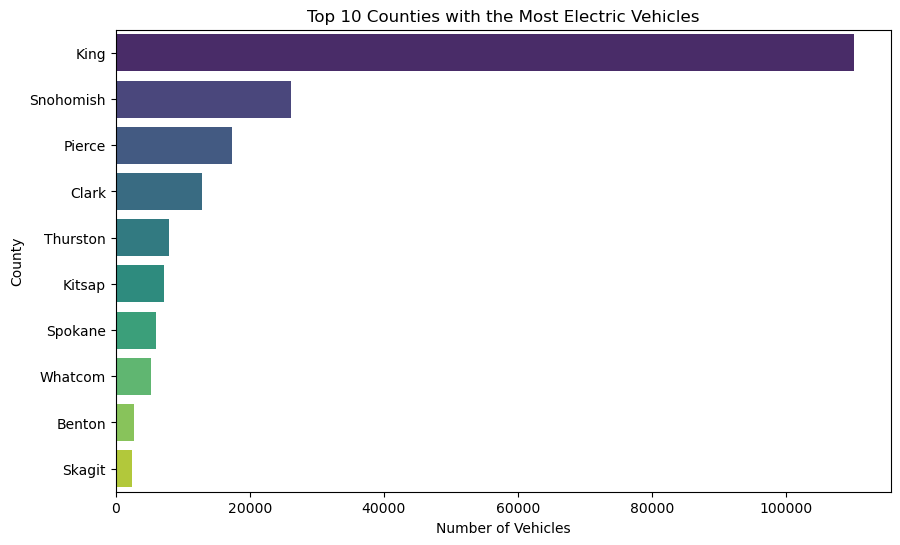

In [124]:
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import folium

top_counties = data_cleaned['County'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_counties.values, y=top_counties.index, palette='viridis')
plt.title('Top 10 Counties with the Most Electric Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('County')
plt.show()

**Popular EV Models and Makes**

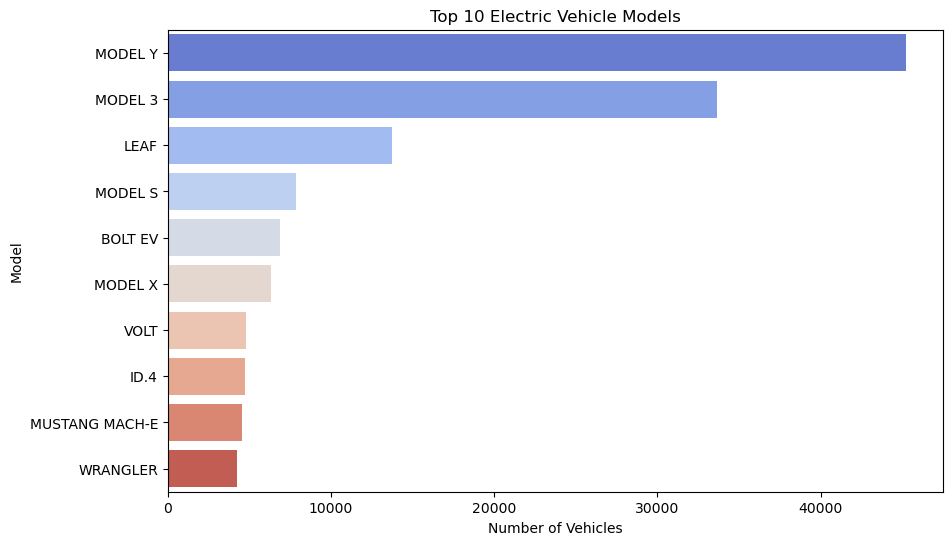

In [152]:
top_models = data_cleaned['Model'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.values, y=top_models.index, palette='coolwarm')
plt.title('Top 10 Electric Vehicle Models')
plt.xlabel('Number of Vehicles')
plt.ylabel('Model')
plt.show()

**Electric Range Distribution**

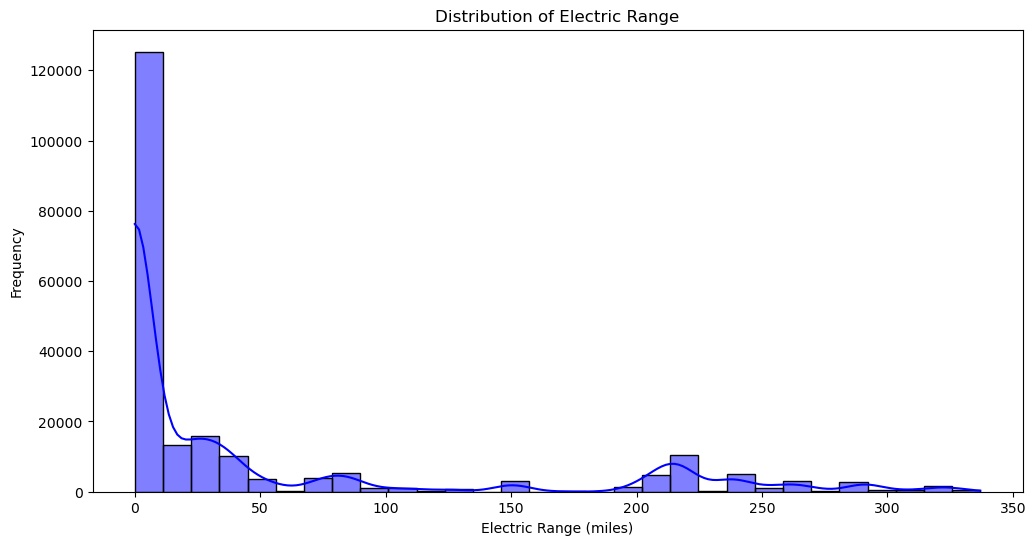

In [151]:
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['Electric Range'], bins=30, kde=True, color='blue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

**CAFV Eligibility Trends**

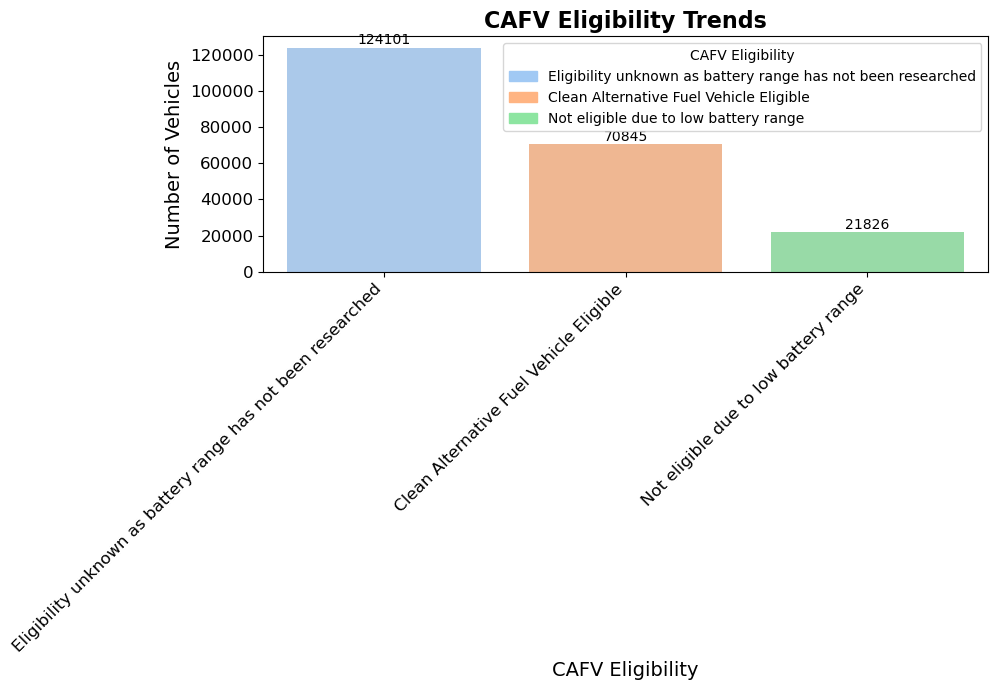

In [128]:
cafv_trend = data_cleaned['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 7))
bars = sns.barplot(
    x=cafv_trend.index, 
    y=cafv_trend.values, 
    palette='pastel'
)

# Add annotations on top of each bar
for i, value in enumerate(cafv_trend.values):
    bars.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=10)

# Mimic a legend using text (since legends are not typical for bar plots)
handles = [
    plt.Rectangle((0, 0), 1, 1, color=color) 
    for color in sns.color_palette('pastel', len(cafv_trend))
]
plt.legend(
    handles, cafv_trend.index, 
    title="CAFV Eligibility", 
    loc="upper right", 
    fontsize=10
)

plt.title('CAFV Eligibility Trends', fontsize=16, fontweight='bold')
plt.xlabel('CAFV Eligibility', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

**Electric Utility Analysis**

In [129]:
# electric_utility_trend = data_cleaned['Electric Utility'].value_counts()
# plt.figure(figsize=(12, 14))
# sns.barplot(x=electric_utility_trend.values, y=electric_utility_trend.index, palette='plasma')
# plt.title('Electric Utility Distribution')
# plt.xlabel('Number of Vehicles')
# plt.ylabel('Electric Utility')
# plt.show()

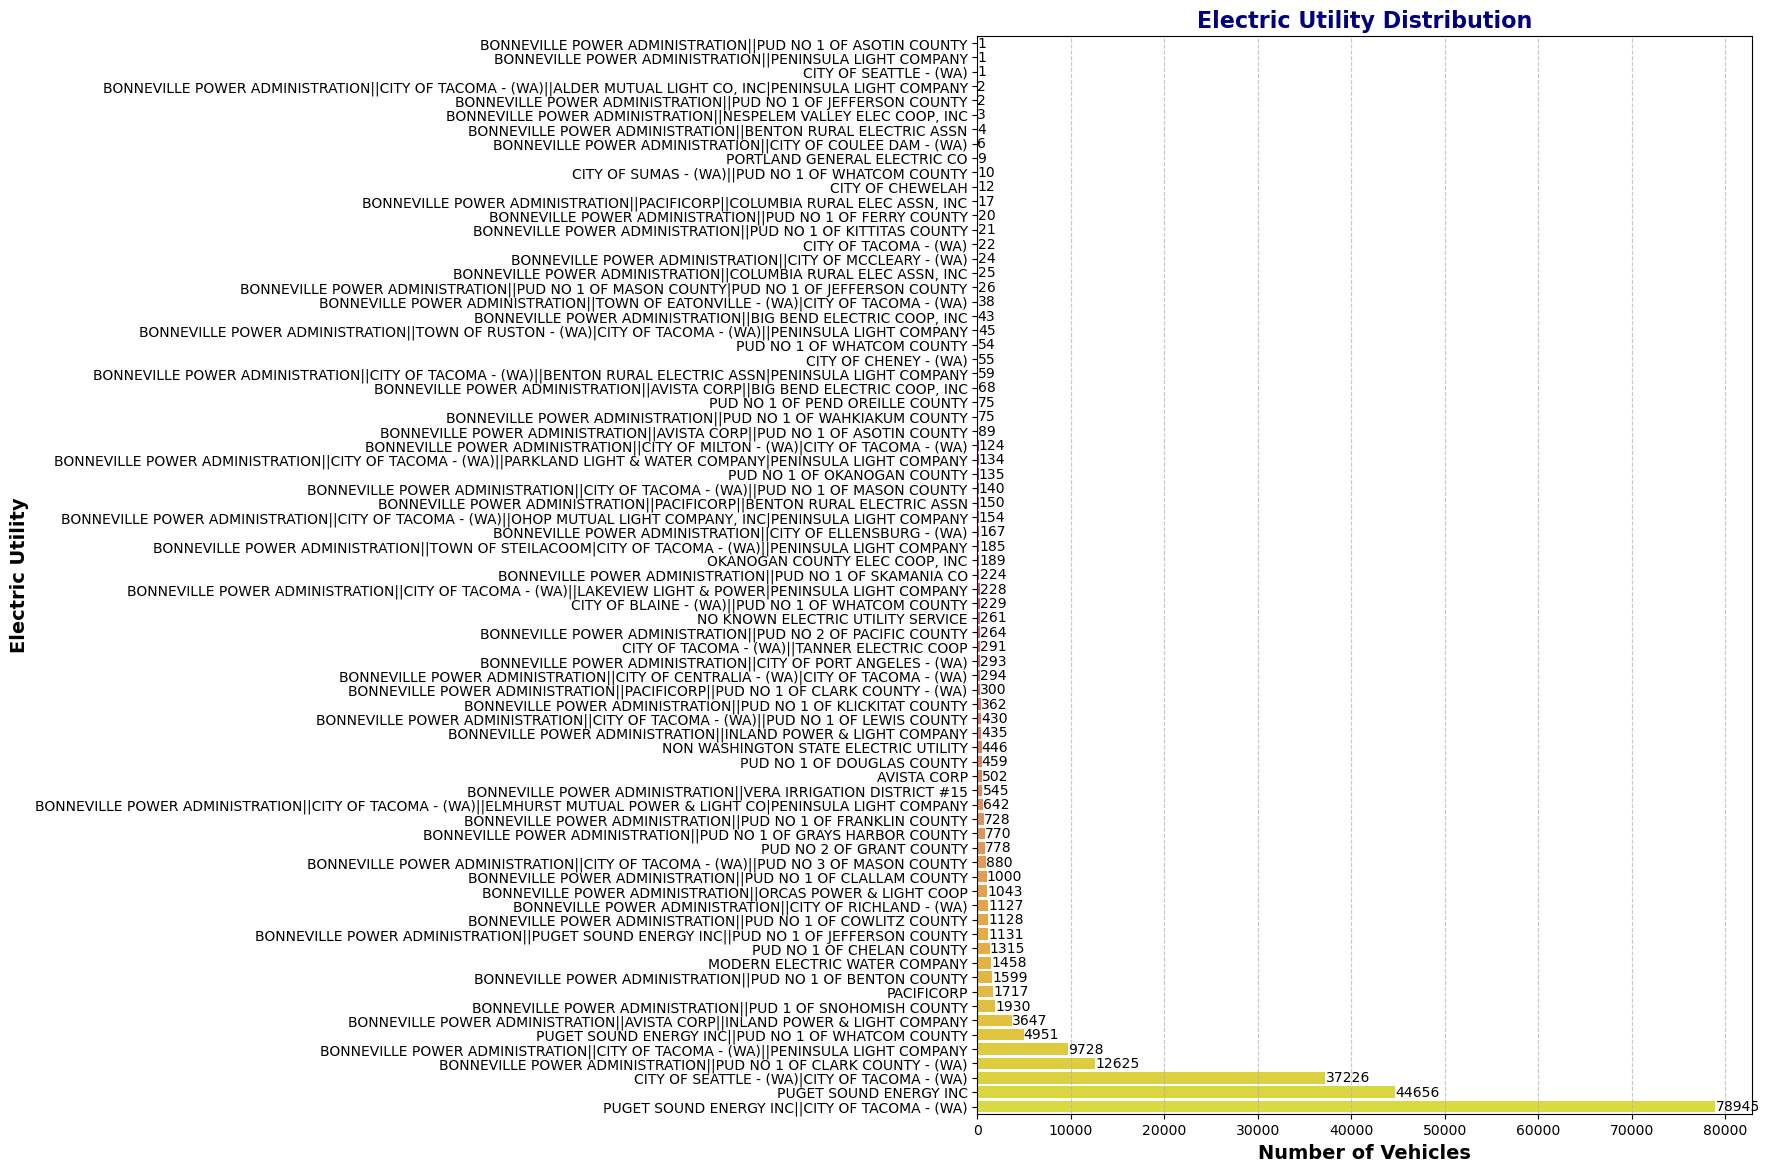

In [130]:
# Sort the data for better visualization
electric_utility_trend = data_cleaned['Electric Utility'].value_counts().sort_values()

# Create the plot
plt.figure(figsize=(10, 14))
sns.barplot(
    x=electric_utility_trend.values,
    y=electric_utility_trend.index,
    # palette='viridis'
    palette='plasma'
)

# Add titles and labels with improved styling
plt.title('Electric Utility Distribution', fontsize=16, weight='bold', color='navy')
plt.xlabel('Number of Vehicles', fontsize=14, weight='bold')
plt.ylabel('Electric Utility', fontsize=14, weight='bold')

# Add values on the bars for clarity
for index, value in enumerate(electric_utility_trend.values):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10, color='black')

# Improve layout and aesthetics
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Legislative District Distribution**

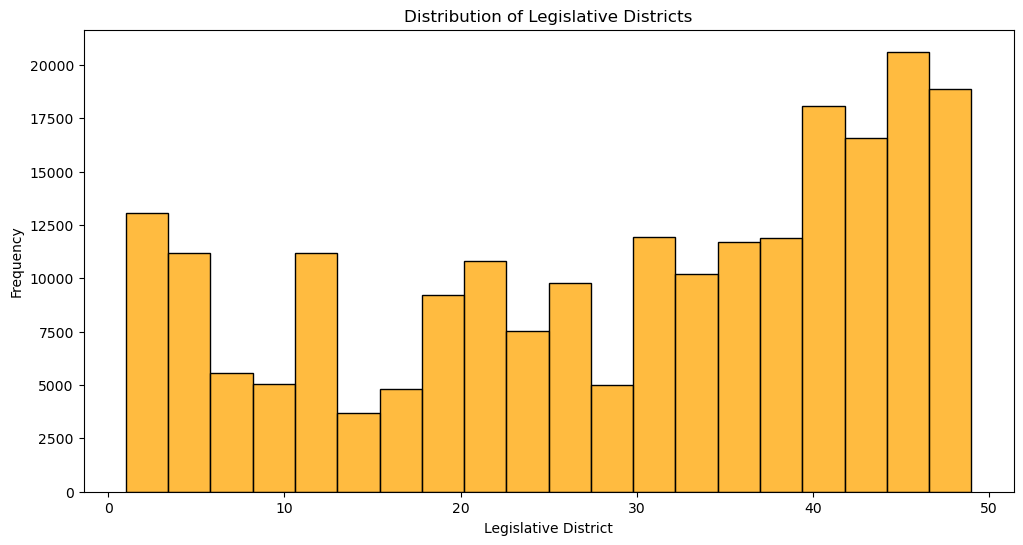

In [150]:
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['Legislative District'], bins=20, kde=False, color='orange')
plt.title('Distribution of Legislative Districts')
plt.xlabel('Legislative District')
plt.ylabel('Frequency')
plt.show()

**Electric Vehicle Price vs. Range (Scatter Plot)**

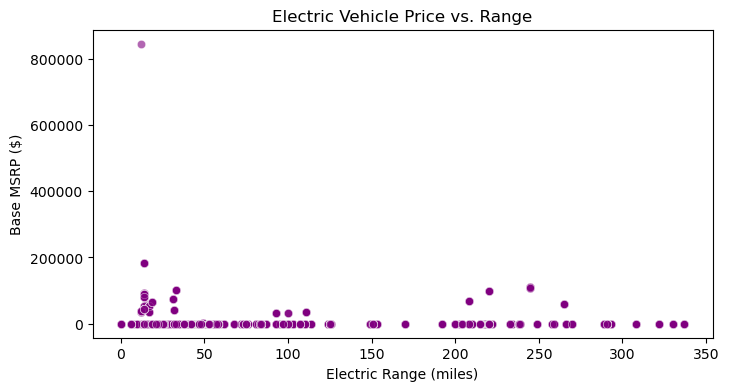

In [149]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=data_cleaned, color='purple', alpha=0.6)
plt.title('Electric Vehicle Price vs. Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.show()

**Pair plot to identify relationships and trends among the variables**

<Figure size 1200x1000 with 0 Axes>

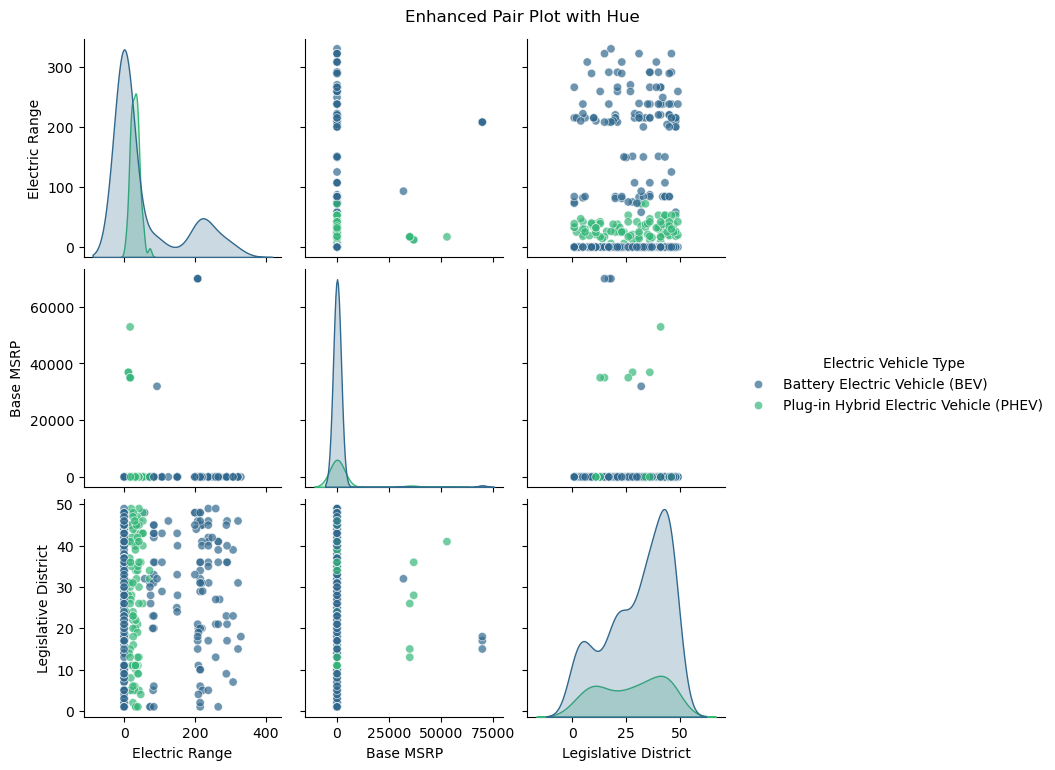

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subsample data for better visualization
sampled_data = data_cleaned.sample(500, random_state=42)

# Selecting features for pair plot and including a hue for category
pairplot_features = ['Electric Range', 'Base MSRP', 'Legislative District']
hue_feature = 'Electric Vehicle Type'

plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(
    sampled_data[pairplot_features + [hue_feature]],
    diag_kind='kde',   # KDE for diagonal plots
    hue=hue_feature,   # Add color coding for EV type
    palette='viridis', # Choose a visually appealing palette
    plot_kws={'alpha': 0.7},  # Adjust transparency
    diag_kws={'shade': True}  # Smooth KDE plots
)

pair_plot.fig.suptitle('Enhanced Pair Plot with Hue', y=1.02)
plt.show()


**Correlation Heatmap (Numerical Features)**

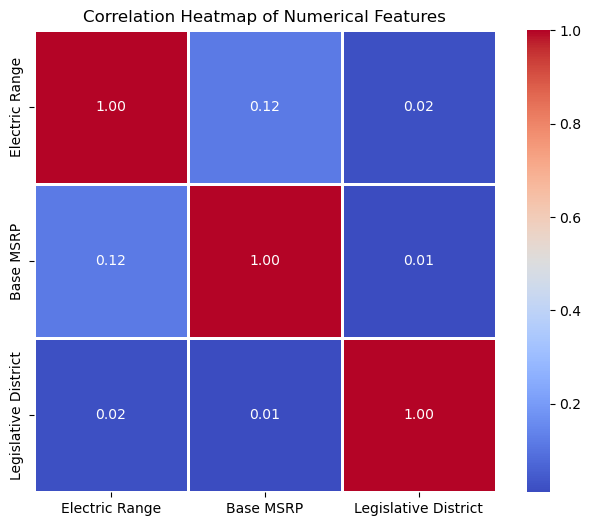

In [147]:
numerical_features = ['Electric Range', 'Base MSRP', 'Legislative District']
corr_matrix = data_cleaned[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

 **Number of Vehicles by Electric Vehicle Type (Bar Chart)**

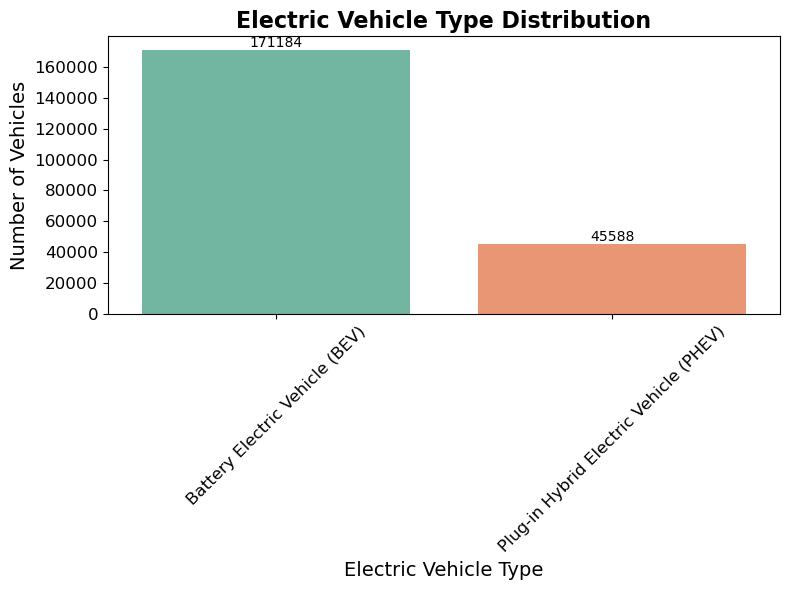

In [146]:
ev_type_trend = data_cleaned['Electric Vehicle Type'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=ev_type_trend.index, y=ev_type_trend.values, palette='Set2')

# Add annotations on top of each bar
for bar, value in zip(bars.patches, ev_type_trend.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        bar.get_height() + 5,  # Slightly above the bar
        str(value), 
        ha='center', va='bottom', fontsize=10
    )

# Enhance the plot
plt.title('Electric Vehicle Type Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Electric Vehicle Type', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

**Vehicle by year**

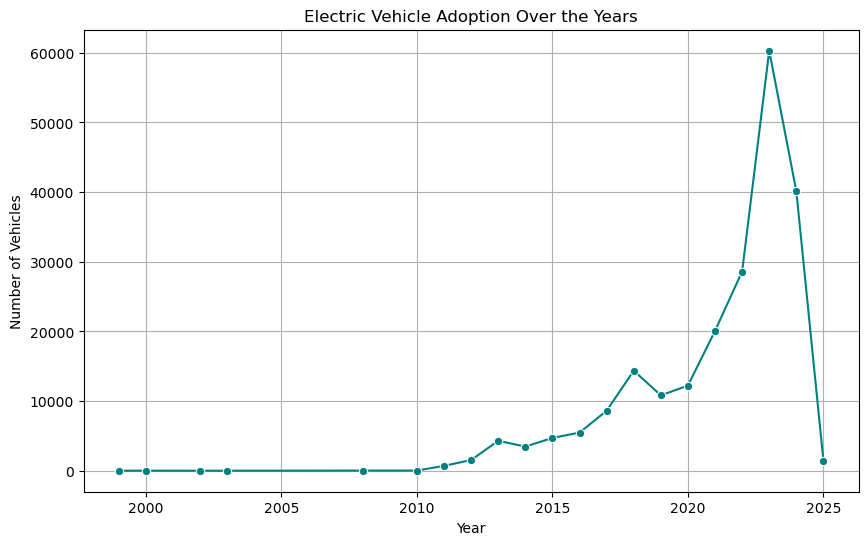

0    2013
1    2019
2    2021
3    2017
4    2016
Name: Model Year, dtype: int64
0


In [145]:
vehicles_by_year = data_cleaned['Model Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=vehicles_by_year.index, y=vehicles_by_year.values, marker='o', color='teal')
plt.title('Electric Vehicle Adoption Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()
print(data_cleaned['Model Year'].head())
print(data_cleaned['Model Year'].isnull().sum())


## Geographical Heatmap
Create a density heatmap to visualize areas with the highest concentration of EVs.

**Geographic Distribution of Electric Vehicles using folium**

In [154]:
map_center = [data_cleaned['Latitude'].mean(), data_cleaned['Longitude'].mean()]
ev_map = folium.Map(location=map_center, zoom_start=7)

# Add markers for a sample of data points
for _, row in data_cleaned.sample(100).iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(ev_map)

# Save the map as an HTML file
ev_map_path = 'Electric_Vehicle_Map.html'
ev_map.save(ev_map_path)

In [138]:
from IPython.display import IFrame

# Path to the HTML file
file_path = 'Electric_Vehicle_Map.html'

# Display the HTML file
IFrame(src=file_path, width=800, height=400)

## 3. Clustering Analysis (K-Means)
Identify clusters of similar regions based on numerical data such as Electric Range, Base MSRP, etc.

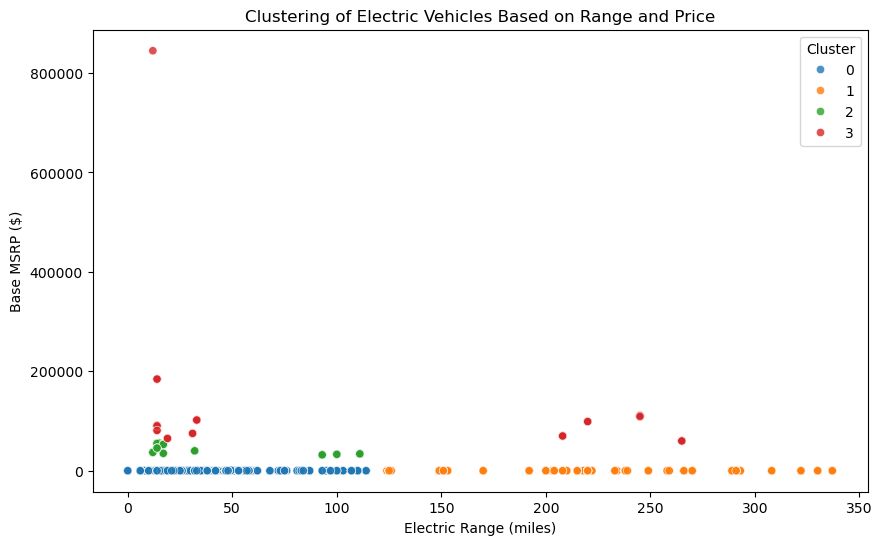

In [139]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_features = ['Electric Range', 'Base MSRP']
data_for_clustering = data_cleaned[clustering_features].dropna()

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_for_clustering['Electric Range'], 
    y=data_for_clustering['Base MSRP'], 
    hue=data_cleaned['Cluster'], 
    palette='tab10', 
    alpha=0.8
)
plt.title('Clustering of Electric Vehicles Based on Range and Price')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.legend(title='Cluster')
plt.show()


## 4. Predictive Modeling
Predict Electric Range based on other features using a regression model.

Mean Squared Error: 7343.6452324977645
R-squared: 0.015652696214777273


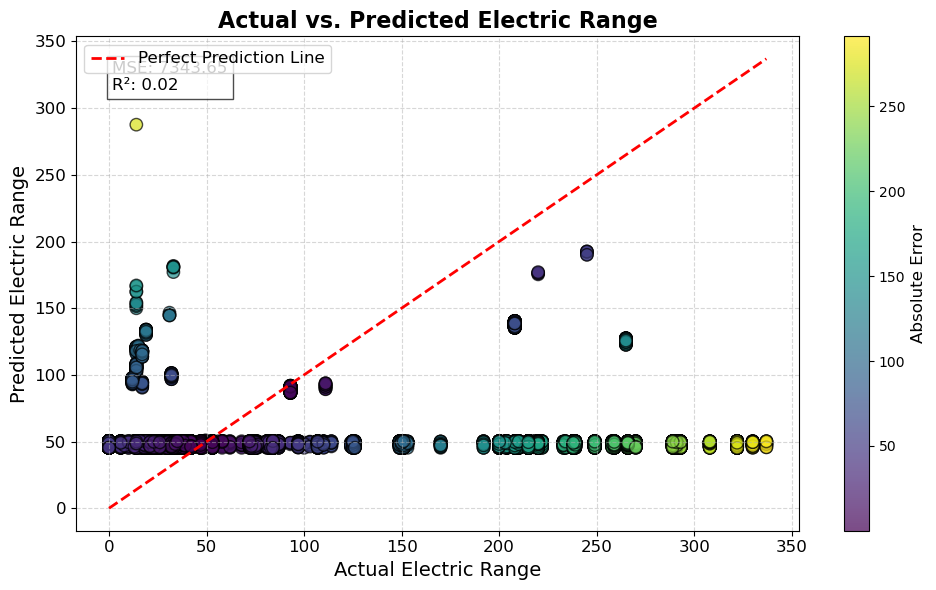

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select features and target
X = data_cleaned[['Base MSRP', 'Legislative District']].dropna()
y = data_cleaned['Electric Range'].dropna()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot actual vs. predicted with enhancements
plt.figure(figsize=(10, 6))

# Scatter plot with color gradient
scatter = plt.scatter(
    y_test, y_pred, 
    c=np.abs(y_test - y_pred), 
    cmap='viridis', 
    alpha=0.7, 
    edgecolor='k', 
    s=80
)

# Add a trend line (perfect predictions line)
plt.plot(
    [y_test.min(), y_test.max()], 
    [y_test.min(), y_test.max()], 
    color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line'
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Error', fontsize=12)

# Add metrics as text
plt.text(
    0.05, 0.95, 
    f"MSE: {mse:.2f}\nR²: {r2:.2f}", 
    fontsize=12, 
    ha='left', 
    va='top', 
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', edgecolor='black', alpha=0.7)
)

# Improve plot aesthetics
plt.title('Actual vs. Predicted Electric Range', fontsize=16, fontweight='bold')
plt.xlabel('Actual Electric Range', fontsize=14)
plt.ylabel('Predicted Electric Range', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

## 5. Interactive Dashboard
Create an interactive dashboard using Dash or Plotly.

In [141]:
from dash import Dash, dcc, html
import plotly.express as px

app = Dash(__name__)

# Example visualization
fig = px.bar(top_counties, x=top_counties.values, y=top_counties.index,
             labels={'x': 'Number of Vehicles', 'y': 'County'},
             title='Top Counties with Most Electric Vehicles')

# Layout
app.layout = html.Div([
    html.H1('Electric Vehicle Population Dashboard'),
    dcc.Graph(figure=fig)
])

# Run the dashboard (ensure the script runs in a live environment)
app.run_server(debug=True)


## Implementing a Classification Model

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Selecting target and features
target = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'
features = ['Electric Range', 'Base MSRP', 'Legislative District', 'County', 'Make']

# Encoding target variable
label_encoder = LabelEncoder()
data_cleaned[target] = label_encoder.fit_transform(data_cleaned[target])

# Encoding categorical features
data_encoded = pd.get_dummies(data_cleaned[features], drop_first=True)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    data_encoded, data_cleaned[target], test_size=0.3, random_state=42
)

**Random Forest Classification**

In [143]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21214
           1       1.00      1.00      1.00     37295
           2       1.00      1.00      1.00      6523

    accuracy                           1.00     65032
   macro avg       1.00      1.00      1.00     65032
weighted avg       1.00      1.00      1.00     65032

Confusion Matrix:
[[21214     0     0]
 [    0 37295     0]
 [    0     0  6523]]
Accuracy Score: 1.0


**Confusion Matrix Heatmap**

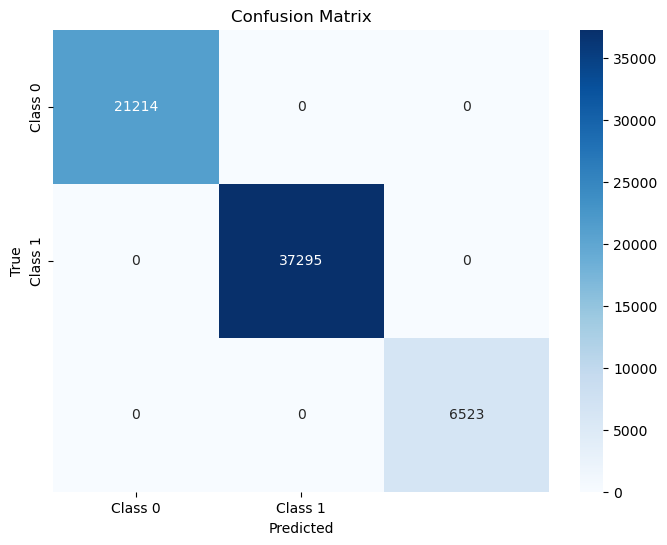

In [153]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
